# **Project Name**    - Unsupervised ML - Netflix Movies and TV Shows Clustering



##### **Project Type**    - EDA
##### **Contribution**    - Individual
#### **Name**            - Shreyash Gongale


# **Project Summary -**

This project focuses on performing Exploratory Data Analysis (EDA) on a dataset containing all TV shows and movies available on Netflix as of 2019. The dataset, collected from Flixable (a third-party Netflix search engine), provides insights into the type, distribution, and availability of Netflix content over the years.

According to a 2018 report, the number of TV shows on Netflix has nearly tripled since 2010, while the number of movies has decreased by over 2,000 titles. This project aims to investigate such trends to determine if Netflix has shifted its focus from movies to TV shows in recent years.

Key objectives include analyzing content availability across different countries, identifying patterns in content type (TV shows vs. movies), and clustering similar content based on text features like descriptions, genres, and cast. These clusters can help understand the nature of content Netflix offers and support recommendation systems.

The project also explores how Netflix's content strategy varies by region, revealing how content is localized for different markets. Visualizations and trend analysis will be used to highlight changes over time and geographical preferences.

Overall, the project delivers data-driven insights into Netflix’s evolving content strategy, helping understand platform priorities, audience preferences, and opportunities for content personalization.

# **GitHub Link -**

# **Problem Statement**


With the rapid growth and diversification of content on streaming platforms, it becomes essential to understand how content offerings have evolved over time. Specifically, Netflix appears to have shifted its focus from movies to TV shows in recent years. However, without thorough analysis, this assumption remains speculative. Additionally, there is limited visibility into the type of content available in various countries and how content clusters based on similarities.

#### **Define Your Business Objective?**

The objective of this project is to perform a comprehensive exploratory data analysis on Netflix's content catalog as of 2019. The goals include:

 * Identifying trends in the distribution of TV shows vs. movies over time.

 * Understanding the availability and type of content across different countries.

 * Determining whether Netflix is strategically shifting focus toward episodic content like TV shows.

 * Clustering content with similar characteristics based on text-based features to enhance content recommendation capabilities.

These insights aim to support strategic decision-making regarding content acquisition, marketing localization, and personalized content delivery on the platform.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Upload step for Google Colab
from google.colab import files
uploaded = files.upload()

# Import pandas
import pandas as pd

# Load the dataset
# Change df to netflix_df
netflix_df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv') # Assign the dataframe to netflix_df instead of df



Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv


### Dataset First View

In [ ]:
# Dataset First Look
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Number of Rows =",netflix_df.shape[0])
print("Number of Columns =",netflix_df.shape[1])

Number of Rows = 7787
Number of Columns = 12


### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Number of Duplicate Values in Dataset =",netflix_df.duplicated().sum())

Number of Duplicate Values in Dataset = 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Number of Missing Values in Dataset =",netflix_df.isnull().sum().sum())

Number of Missing Values in Dataset = 3631


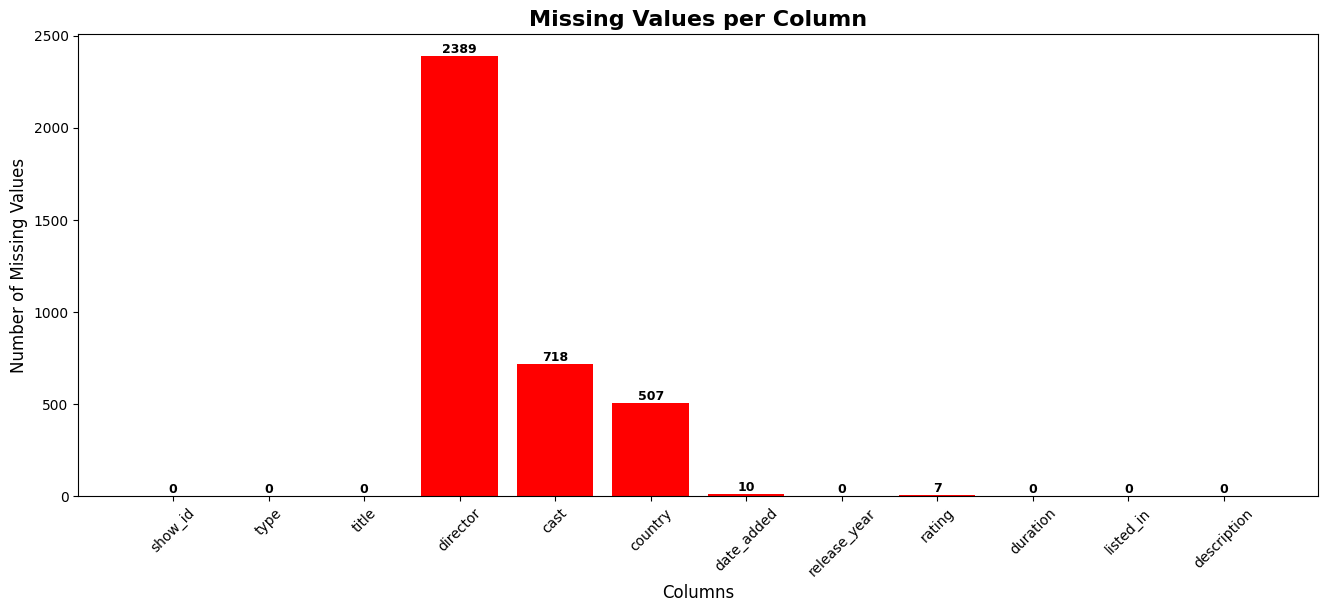

In [ ]:
# Visualizing the missing values
# Calculating the number of missing values per column
missing_values = netflix_df.isnull().sum()

# Plotting the missing values
fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(missing_values.index, missing_values.values, color='red')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}',
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# Adding labels and title
plt.title('Missing Values per Column', fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

### What did you know about your dataset?

The Netflix dataset comprises 7,787 records and 12 columns, capturing detailed information about TV shows and movies available on the platform as of 2019. It includes key attributes such as title, type (movie or TV show), director, cast, country, date added, release year, rating, duration, genres (listed_in), and description. Notably, the dataset is clean with no duplicate rows. However, it contains 3,631 missing values spread across five columns — with the highest being in the director (2,389) and cast (718) fields, followed by country (507), date_added (10), and rating (7). These gaps indicate that metadata for some entries, especially related to creative contributors and geographic origin, may be incomplete. Despite this, the dataset is rich and well-suited for exploratory analysis on content trends, genre distribution, and regional availability.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

1. **show_id:** Unique identifier for each show in the dataset.

2. **type:** Indicates whether the entry is a Movie or a TV Show.

3. **title:** The name of the show or movie.

4. **director:** Name of the directors

5. **cast:** List of main actors.

6. **country:** Country where the show/movie was produced.

7. **date_added:** The date the title was added to Netflix.

8. **release_year:** The year the show or movie was originally released.

9. **rating:** Age rating of the content (e.g., TV-MA, PG-13).

10. **duration:** Length of the movie (in minutes) or number of seasons for a TV show.

11. **listed_in:** Genres or categories assigned to the title.

12. **description:** A short summary of the content.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in netflix_df.columns:
  print("No. of unique values in",i,"=",netflix_df[i].nunique())

No. of unique values in show_id = 7787
No. of unique values in type = 2
No. of unique values in title = 7787
No. of unique values in director = 4049
No. of unique values in cast = 6831
No. of unique values in country = 681
No. of unique values in date_added = 1565
No. of unique values in release_year = 73
No. of unique values in rating = 14
No. of unique values in duration = 216
No. of unique values in listed_in = 492
No. of unique values in description = 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# 1. Create copy of dataset
df = netflix_df.copy()

In [ ]:
# 2. Fill missing values
df['director'].fillna("Not Available", inplace=True)
df['cast'].fillna("Not Available", inplace=True)
df['country'].fillna("Not Available", inplace=True)
df['date_added'].fillna("Not Available", inplace=True)
df['rating'].fillna("Not Rated", inplace=True)

In [ ]:
# 3. Converting date_added column to date_time datatype
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [ ]:
# 4. Extracting year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

In [ ]:
# 5. Converting year into int datatype
df['year_added'] = df['year_added'].astype('Int64')

In [ ]:
# 6. Drop irrelevant columns
df.drop(columns = ['show_id'], inplace = True)

In [ ]:
# 7. Creating genre list
# Strip whitespace and ensure consistency
df['listed_in'] = df['listed_in'].str.strip()

# Create a list of genres in a new column
df['genre_list'] = df['listed_in'].str.split(',\s*')  # Splits by comma and strips spaces

# Flatten all genres into one list to find unique genres
from itertools import chain
all_genres = list(chain.from_iterable(df['genre_list']))
unique_genres = set(all_genres)
print(unique_genres)

{'Faith & Spirituality', 'Teen TV Shows', 'Action & Adventure', 'TV Shows', 'Romantic TV Shows', 'Independent Movies', 'Thrillers', 'Comedies', 'Stand-Up Comedy', 'Movies', 'TV Horror', 'Dramas', 'Cult Movies', 'TV Action & Adventure', 'Science & Nature TV', 'Sci-Fi & Fantasy', 'Reality TV', 'Classic Movies', 'TV Mysteries', 'International Movies', 'TV Sci-Fi & Fantasy', 'Anime Series', "Kids' TV", 'Stand-Up Comedy & Talk Shows', 'TV Dramas', 'Spanish-Language TV Shows', 'Crime TV Shows', 'Docuseries', 'Horror Movies', 'TV Comedies', 'Sports Movies', 'British TV Shows', 'Documentaries', 'International TV Shows', 'Music & Musicals', 'LGBTQ Movies', 'Classic & Cult TV', 'Children & Family Movies', 'TV Thrillers', 'Anime Features', 'Romantic Movies', 'Korean TV Shows'}


In [ ]:
# 8. Value count for each genre
from collections import Counter
# Flatten all genres into one list
all_genres = [genre for sublist in df['genre_list'] for genre in sublist]

# Count occurrences of each genre
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False)

# Display genre counts
print(genre_counts)

International Movies            2437
Dramas                          2106
Comedies                        1471
International TV Shows          1199
Documentaries                    786
Action & Adventure               721
TV Dramas                        704
Independent Movies               673
Children & Family Movies         532
Romantic Movies                  531
TV Comedies                      525
Thrillers                        491
Crime TV Shows                   427
Kids' TV                         414
Docuseries                       353
Romantic TV Shows                333
Stand-Up Comedy                  329
Music & Musicals                 321
Horror Movies                    312
British TV Shows                 232
Reality TV                       222
Sci-Fi & Fantasy                 218
Sports Movies                    196
Korean TV Shows                  150
TV Action & Adventure            150
Anime Series                     148
Spanish-Language TV Shows        147
C

In [ ]:
# 9. Drop rows where 'date_added' is missing
df = df.dropna(subset=['date_added']).reset_index(drop=True)

In [ ]:
# 10. Extract numeric duration and duration type
df[['duration_value', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')

# Convert duration_value to numeric type
df['duration_value'] = pd.to_numeric(df['duration_value'])


In [ ]:
# 11. Standardize the duration_type
df['duration_type'] = df['duration_type'].replace({'Seasons': 'Season'})
df['duration_type'] = df['duration_type'].replace({'min' : 'Minutes'})

In [ ]:
# 12. Show you the most frequent or meaningful terms used in content descriptions of each cluster
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.cluster import KMeans # Import KMeans for clustering

# 1. Perform KMeans clustering (example with 5 clusters)
n_clusters = 5  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # Initialize KMeans
kmeans = kmeans.fit(df[['duration_value']]) # Fit KMeans to your data (example using 'duration_value')
df['cluster'] = kmeans.labels_  # Assign cluster labels to your DataFrame


# Reuse the same vectorizer used for clustering
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(df['description'])

# Create a helper function to print top words per cluster
def print_top_words(cluster_number, n=15):
    indices = df[df['cluster'] == cluster_number].index
    cluster_tfidf = X_tfidf[indices]
    mean_tfidf = cluster_tfidf.mean(axis=0).A1
    top_indices = mean_tfidf.argsort()[::-1][:n]
    top_words = [tfidf.get_feature_names_out()[i] for i in top_indices]
    print(f"Top words for Cluster {cluster_number}:", top_words)

# Print for each cluster
for i in range(kmeans.n_clusters):
    print_top_words(i)

Top words for Cluster 0: ['stand', 'special', 'comedian', 'documentary', 'comic', 'comedy', 'life', 'new', 'takes', 'stage', 'world', 'stories', 'family', 'star', 'shares']
Top words for Cluster 1: ['series', 'world', 'life', 'new', 'friends', 'family', 'love', 'young', 'school', 'high', 'lives', 'group', 'help', 'woman', 'years']
Top words for Cluster 2: ['man', 'young', 'love', 'family', 'woman', 'father', 'life', 'falls', 'girl', 'friends', 'brother', 'marry', 'wife', 'son', 'help']
Top words for Cluster 3: ['life', 'young', 'new', 'man', 'documentary', 'woman', 'family', 'world', 'father', 'finds', 'home', 'love', 'school', 'friends', 'old']
Top words for Cluster 4: ['young', 'man', 'woman', 'life', 'love', 'family', 'new', 'father', 'wife', 'daughter', 'finds', 'son', 'girl', 'world', 'old']


In [ ]:
# 13. Shows the most common genre in each cluster
genre_by_cluster = df.groupby('cluster')['listed_in'].apply(lambda x: x.mode()[0])
print(genre_by_cluster)

cluster
0                           Stand-Up Comedy
1                                  Kids' TV
2    Comedies, Dramas, International Movies
3                             Documentaries
4              Dramas, International Movies
Name: listed_in, dtype: object


In [ ]:
# View cleaned dataset
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre_list,duration_value,duration_type,cluster
0,TV Show,3%,Not Available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,"[International TV Shows, TV Dramas, TV Sci-Fi ...",4,Season,1
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,"[Dramas, International Movies]",93,Minutes,3
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,"[Horror Movies, International Movies]",78,Minutes,0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,"[Action & Adventure, Independent Movies, Sci-F...",80,Minutes,3
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,[Dramas],123,Minutes,4


### What all manipulations have you done and insights you found?

#### **Manipulations:**
1. **Created a Copy of the Dataset-**

 * Ensured the original dataset remains unchanged for reference and backup.

2. **Handled Missing Values-**

 * Filled missing values in columns like director, cast, country, rating, and date_added with appropriate placeholders or removed them where necessary (e.g., dropped rows where date_added was missing to preserve time-based analysis accuracy).

3. **Converted date_added to DateTime Format-**

 * Enabled accurate extraction of time-based features and chronological analysis of content added to Netflix.

4. **Extracted Year and Month from date_added-**

 * Created new columns (year_added, month_added) for trend analysis of content over time.

5. **Converted Year to Integer Format-**

 * Allowed numeric-based grouping and sorting for time series analysis.

6. **Dropped Irrelevant Columns-**

 * Removed non-analytical columns like show_id that do not contribute insights to the analysis.

7. **Cleaned and Standardized the listed_in (Genre) Column-**

 * Split multiple genres into lists and trimmed whitespace, enabling more accurate genre-wise analysis.

8. **Performed Value Counts for Each Genre-**

 * Helped in identifying the most common content categories on Netflix, such as Drama, International Movies, or Comedies.

9. **Dropped Rows with Null date_added-**

 * Ensured consistency in time-based trend analysis.

10. **Extracted Numeric and Type from duration Column-**

 * Separated numeric values and units (e.g., minutes vs. seasons) to enable distinct analysis for movies and TV shows.

11. **Standardized duration_type Values-**

 * Ensured consistency by normalizing values (e.g., "Season" and "Seasons" both mapped to a standard "Season").

12. **Clustering Based on Textual Features (Title, Genre, Description)-**
 * Used text vectorization and dimensionality reduction to group similar content into clusters.
 * Found out most common Genre per cluster which helps to understand what type of content each cluster primarily contains (e.g., documentaries, dramas, stand-up comedy).
 * Found out most frequent terms in descriptions per cluster to provide deeper thematic understanding of each cluster's content focus (e.g., emotional themes, cultural references, comic narratives).

----
#### **Insights:**
1. A significant number of missing values were found in director and cast, showing many shows lack complete credits.

2. The most common content type is Movies, but year-wise trends can reveal whether TV Shows are increasing over time.

3. After genre extraction, it was found that Drama, Comedies, and International Movies are among the most frequently occurring genres.

4. Cleaning the duration column helped distinguish between TV Shows (with seasons) and Movies (with duration in minutes), setting the foundation for separate analysis by content type.

5. Removing rows without date_added ensured reliable trend analysis across years and months, aiding in understanding content release patterns.

6. Clustering revealed meaningful natural groupings of content that aligned well with real genres, validating that text-based features can successfully categorize shows and movies.

7. Specific clusters such as Stand-Up Comedy or International Dramas stood out clearly, suggesting they can be targeted individually for recommendation or marketing.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Set chart style
plt.style.use('ggplot')

### **Univariate Analysis**

#### Chart - 1 - Content Type Distribution

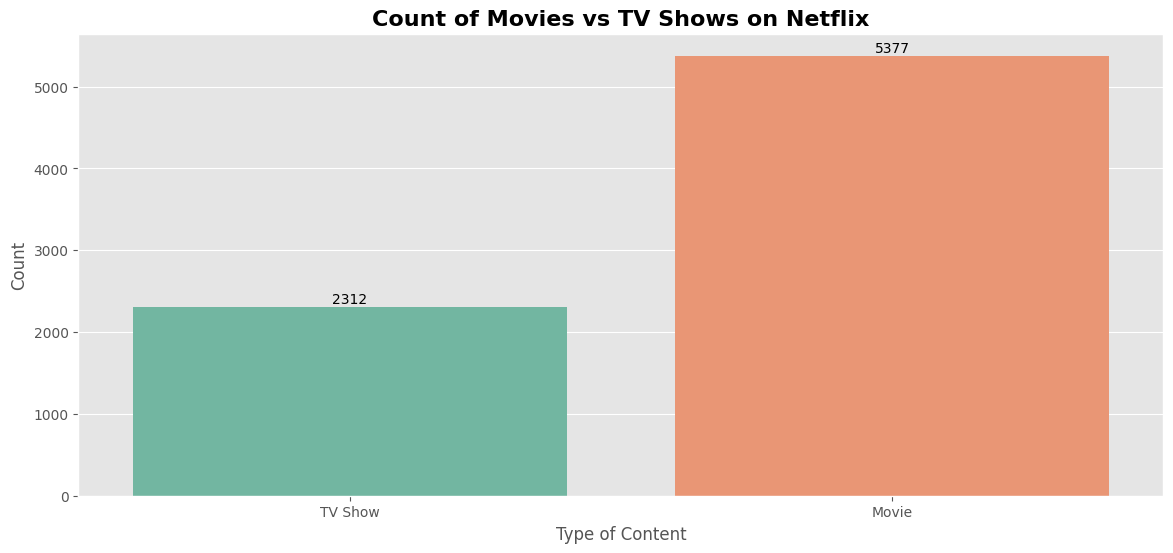

In [ ]:
# Chart - 1 visualization code
# Bar plot for count of Movies vs TV Shows
# Set figure size
plt.figure(figsize=(14, 6))
# Create countplot
sns.countplot(data=df, x='type', palette='Set2')
# Add labels and title
plt.title("Count of Movies vs TV Shows on Netflix", fontsize = 16, fontweight = 'bold')
plt.xlabel("Type of Content")
plt.ylabel("Count")
# Add data labels
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()),
             ha='center', va='bottom', fontsize=10)
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart is ideal to show categorical comparison between the two types of content—Movies and TV Shows—available on Netflix. It helps us quickly gauge which format dominates the platform.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Movies significantly outnumber TV Shows on Netflix. This implies a heavier emphasis on film-based content compared to episodic series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**
Understanding this content balance helps stakeholders determine whether to invest more in movies or diversify into TV shows. If TV shows lead to better retention (due to binge-watching), this insight could influence strategic content development.

#### Chart - 2 - Top 10 Countries by Content Production

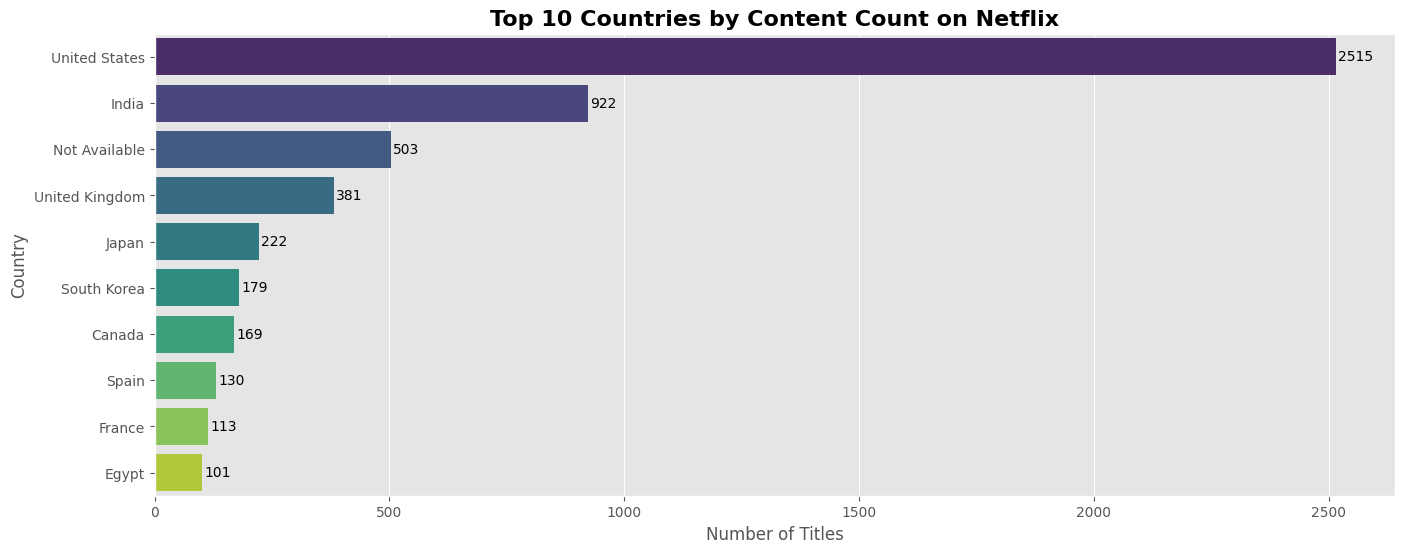

In [ ]:
# Chart - 2 visualization code
# Top 10 Countries by Content Production
# Set figure size
plt.figure(figsize=(16, 6))
# Finding top countries
top_countries = df['country'].value_counts().head(10)
# Create bar plot
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
# Add labels and title
plt.title("Top 10 Countries by Content Count on Netflix", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of Titles")
plt.ylabel("Country")
# Add data labels
for i, v in enumerate(top_countries.values):
    plt.text(v + 5, i, str(v), va='center')
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is best suited for displaying top contributors (countries in this case), especially when dealing with longer categorical names and counts.

##### 2. What is/are the insight(s) found from the chart?

The United States is the largest contributor to Netflix’s content library, followed by India and the United Kingdom. This highlights regional focus and production partnerships.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**
This can guide localization strategies. For instance, if India ranks high in content, Netflix might consider enhancing its regional content offerings, marketing, or pricing strategies in that region.

#### Chart - 3 - Top 10 Content Ratings

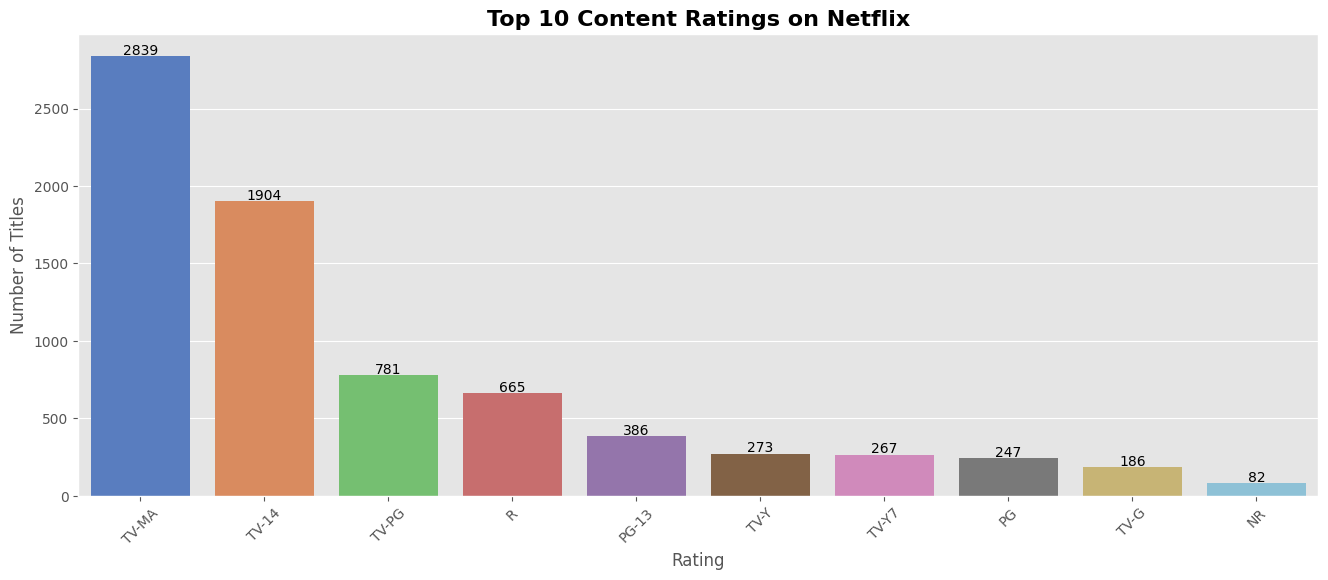

In [ ]:
# Chart - 3 visualization code
# Top 10 Content Ratings
# Set figure size
plt.figure(figsize=(16, 6))
# Finding top 10 rating
top_ratings = df['rating'].value_counts().head(10)
# Create bar plot
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='muted')
# Add labels and title
plt.title("Top 10 Content Ratings on Netflix", fontsize = 16, fontweight = 'bold')
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
# Set x-ticks rotation
plt.xticks(rotation=45)
# Add data labels
for i, v in enumerate(top_ratings.values):
    plt.text(i, v + 10, str(v), ha='center')
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart gives a clear picture of which content ratings are most prevalent, helping to understand the target audience.

##### 2. What is/are the insight(s) found from the chart?

TV-MA (Mature Audience) and TV-14 are the most common, indicating Netflix's focus on teen and adult viewers. Ratings for general or younger audiences are less frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**
This helps Netflix optimize its content strategy for its main viewer demographics. However, the lack of content for children may represent an untapped market segment, which could lead to growth if addressed.

#### Chart - 4 - Top 10 Genres

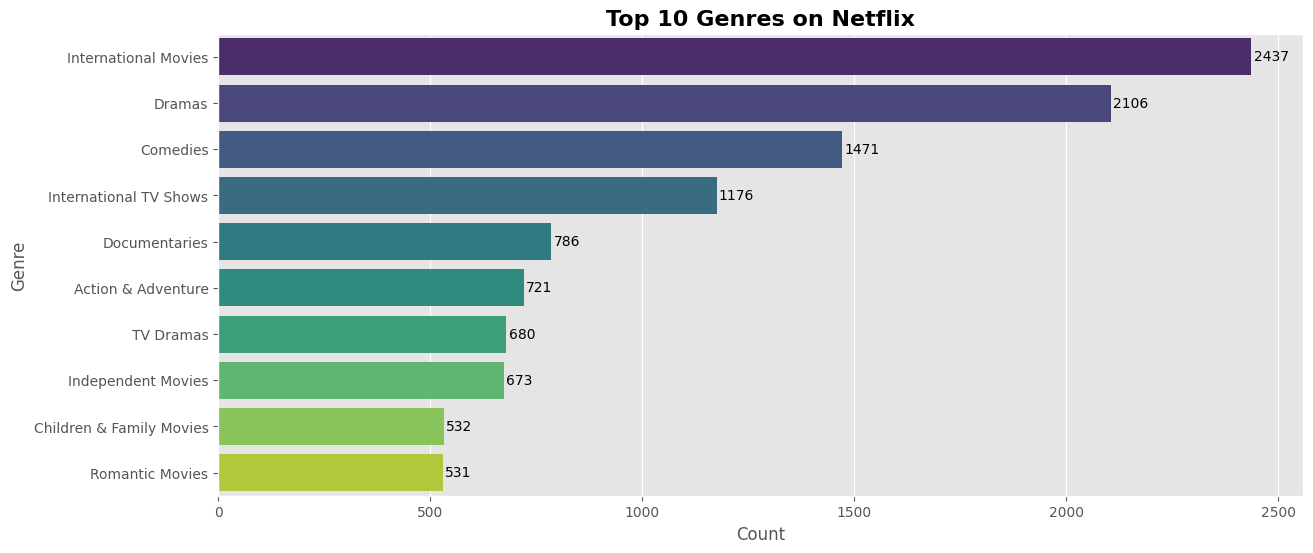

In [ ]:
# Chart - 4 visualization code
# Top 10 genres
# Finding top 10 genres
top_genres = df['genre_list'].explode().value_counts().head(10)
# Set figure size
plt.figure(figsize=(14,6))
# Create bar plot
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
# Add title and labels
plt.title('Top 10 Genres on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Genre')
# Add data labels
for index, value in enumerate(top_genres.values):
    plt.text(value + 5, index, str(value), va='center')
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are ideal for comparing frequency across categories. Since genres are a key part of user content preferences, visualizing the most frequent genres can help identify what content dominates the platform.

##### 2. What is/are the insight(s) found from the chart?

The most common genres include International Movies, Dramas, and Comedies. This suggests Netflix prioritizes diverse storytelling and emotional or humor-driven content that appeals to a wide audience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**
Understanding which genres perform well can help Netflix acquire or produce similar content.

**Negative Impact-**
There's no negative growth insight here, but an over-reliance on a few genres might risk market saturation.

#### Chart - 5 - Year-wise Count Plot

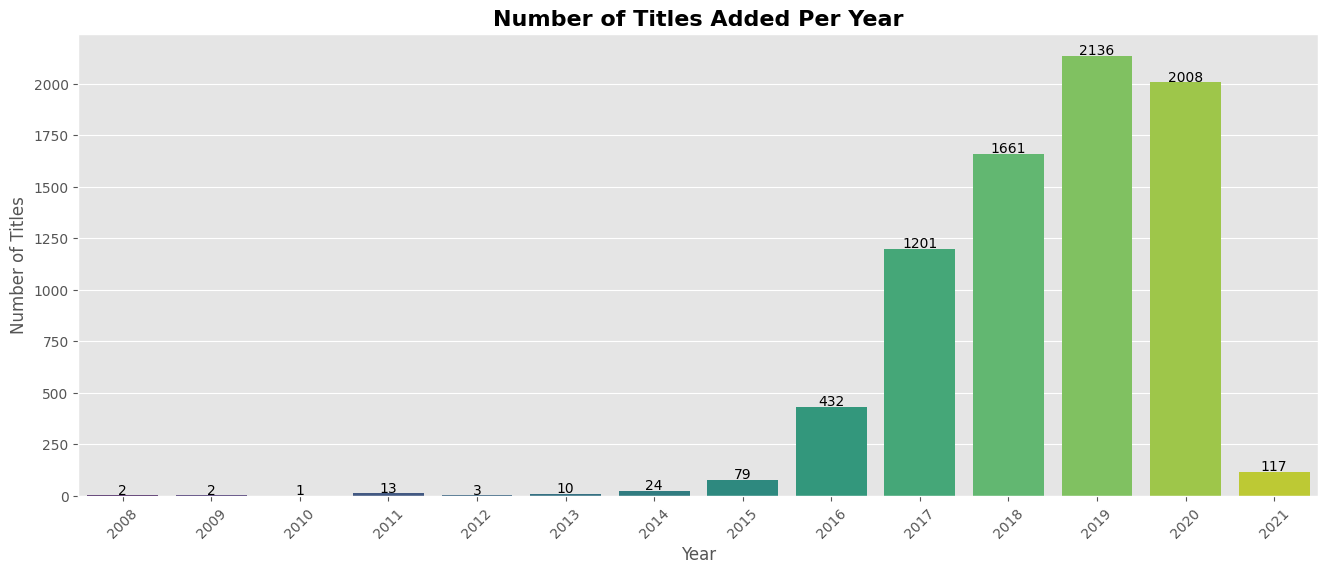

In [ ]:
# Chart - 5 visualization code
# Year-wise Count Plot
# Set figure size
plt.figure(figsize=(16,6))
# Create countplot
sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().astype(int).unique()), palette='viridis')
# Set rotation for x-ticks
plt.xticks(rotation=45)
# Add title and labels
plt.title('Number of Titles Added Per Year', fontsize = 16, fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
# Add data labels
for index, value in enumerate(df['year_added'].value_counts().sort_index().values):
    plt.text(index, value + 5, str(value), ha='center')
# Show plot
plt.show()



##### 1. Why did you pick the specific chart?

This helps observe how Netflix's content library evolved over time.

##### 2. What is/are the insight(s) found from the chart?

Most titles were added around 2017 - 2020, indicating rapid expansion during those years, especially during pandemic years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**
Understanding high-content years helps plan future licensing/acquisitions.

**Negative Impact-**
No negative trends, but post-pandemic content dip may reflect reduced production or new strategy.

#### Chart - 6 - Month-wise Count Plot


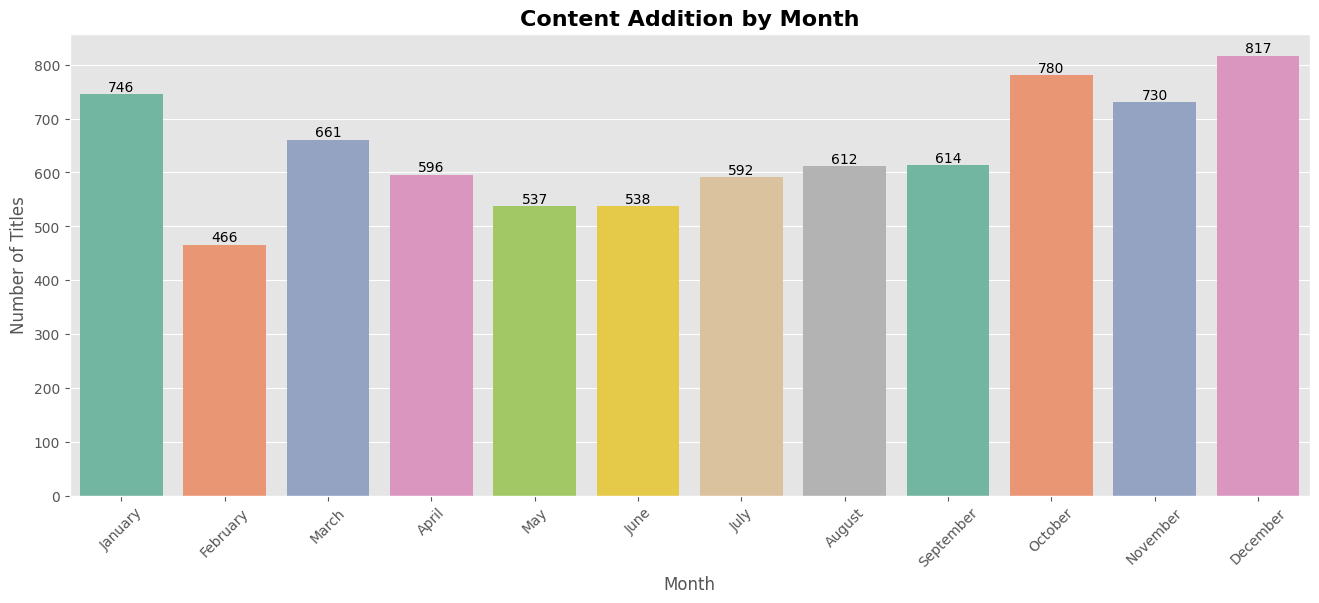

In [ ]:
# Chart - 6 visualization code
# Month-wise Count Plot
# Set month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
# Set figure size
plt.figure(figsize=(16,6))
# Create countplot
ax = sns.countplot(data=df, x='month_added', order=month_order, palette='Set2')
# Add data labels
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)
# Add title and labels
plt.title('Content Addition by Month', fontsize = 16, fontweight = 'bold')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
# Set rotation for x-ticks
plt.xticks(rotation=45)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

It uncovers seasonal trends in content releases, which can influence marketing and engagement strategies.

##### 2. What is/are the insight(s) found from the chart?

December sees a significant rise, likely due to holiday season promotions. Lesser content is added mid-year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**
Helps in aligning new launches with viewer activity patterns.

**Negative Impact-**
Not a negative sign, but off-season periods could be optimized with strategic releases.



#### Chart - 7 - Distribution of Movie Duration (in minutes)

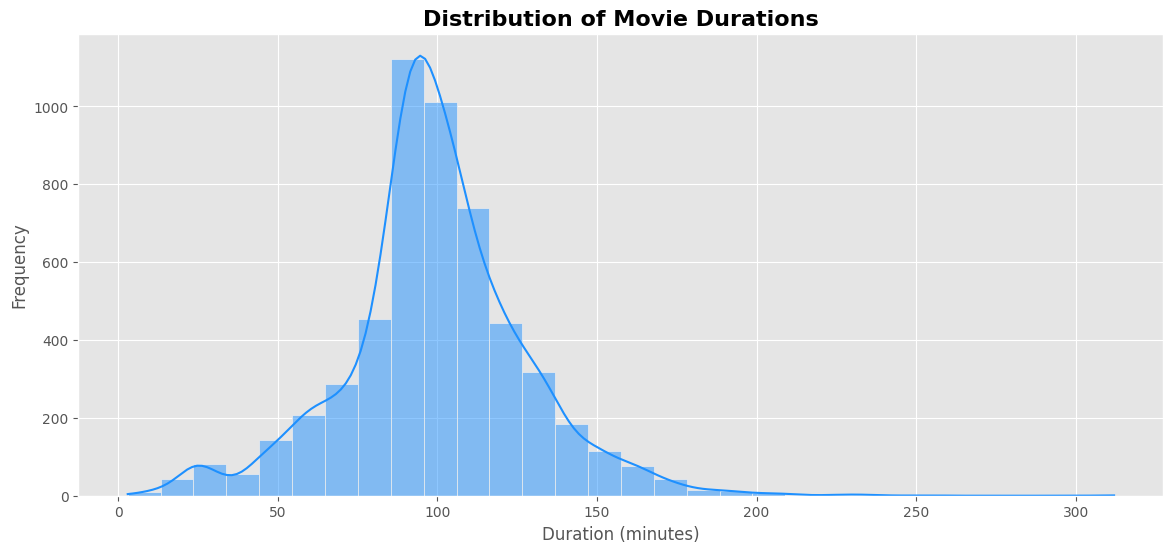

In [ ]:
# Chart - 7 visualization code
# Histogram of Movie Duration (in minutes)
# Filter duration type to minutes
movie_data = df[df['duration_type'] == 'Minutes']
# Set figure size
plt.figure(figsize=(14,6))
# Create histogram
sns.histplot(movie_data['duration_value'], bins=30, kde=True, color='dodgerblue')
# Add title and labels
plt.title('Distribution of Movie Durations', fontsize = 16, fontweight = 'bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
# Show Plot
plt.show()


##### 1. Why did you pick the specific chart?

Histograms are perfect to understand the spread of numerical data, in this case, movie lengths.

##### 2. What is/are the insight(s) found from the chart?

Most movies are between 80-100 minutes long, showing Netflix prefers standard-length films suitable for casual viewing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**
Knowing the sweet spot helps inform new content creation.

**Negative Impact-**
No major downside, but a lack of longer films may limit niche audiences.

#### Chart - 8 - Bar Plot of Number of Seasons (TV Shows)

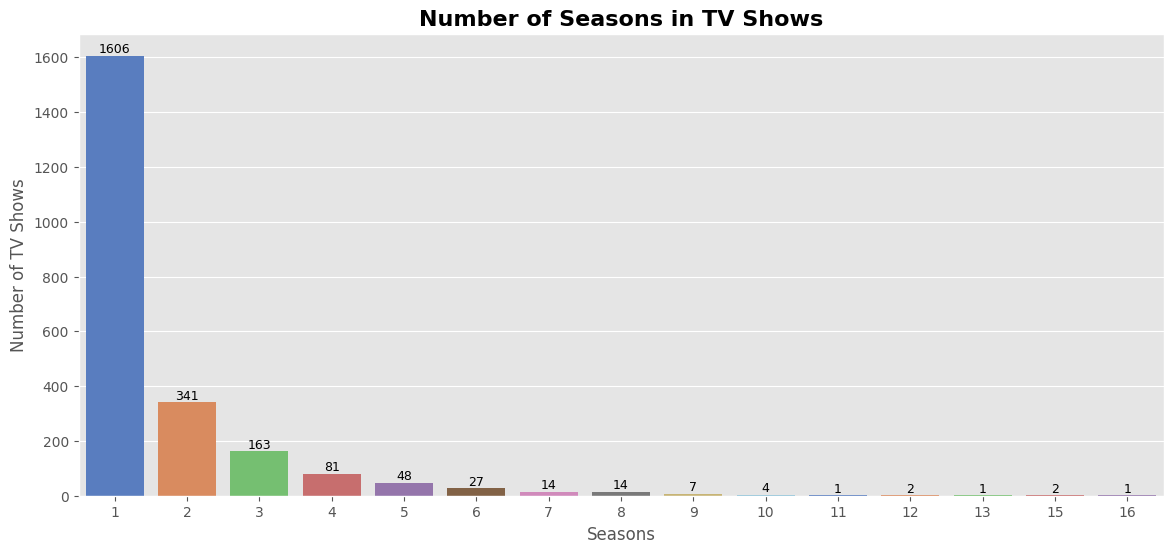

In [ ]:
# Chart - 8 visualization code
# Bar Plot of Number of Seasons (TV Shows)
# Filter the duration type to season
tv_shows = df[df['duration_type'] == 'Season']
# Calculating season counts
season_count = tv_shows['duration_value'].value_counts().sort_index()
# Set figure size
plt.figure(figsize=(14,6))
# Create bar plot
ax = sns.barplot(x=season_count.index, y=season_count.values, palette='muted')
# Add data labels
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)
# Add title and labels
plt.title('Number of Seasons in TV Shows', fontsize = 16, fontweight = 'bold')
plt.xlabel('Seasons')
plt.ylabel('Number of TV Shows')
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

Gives insight into how long Netflix shows run, indicating viewer engagement strategies and series planning.

##### 2. What is/are the insight(s) found from the chart?

Most shows have just 1 season. This could indicate anthology-style content or many short series without renewals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Short shows cater to binge-watching trends and are cheaper to produce. But too many 1-season series may reflect viewer dissatisfaction or poor reception.



### **Bivariate Analysis**

#### Chart - 9 - Content Type Over Year Added

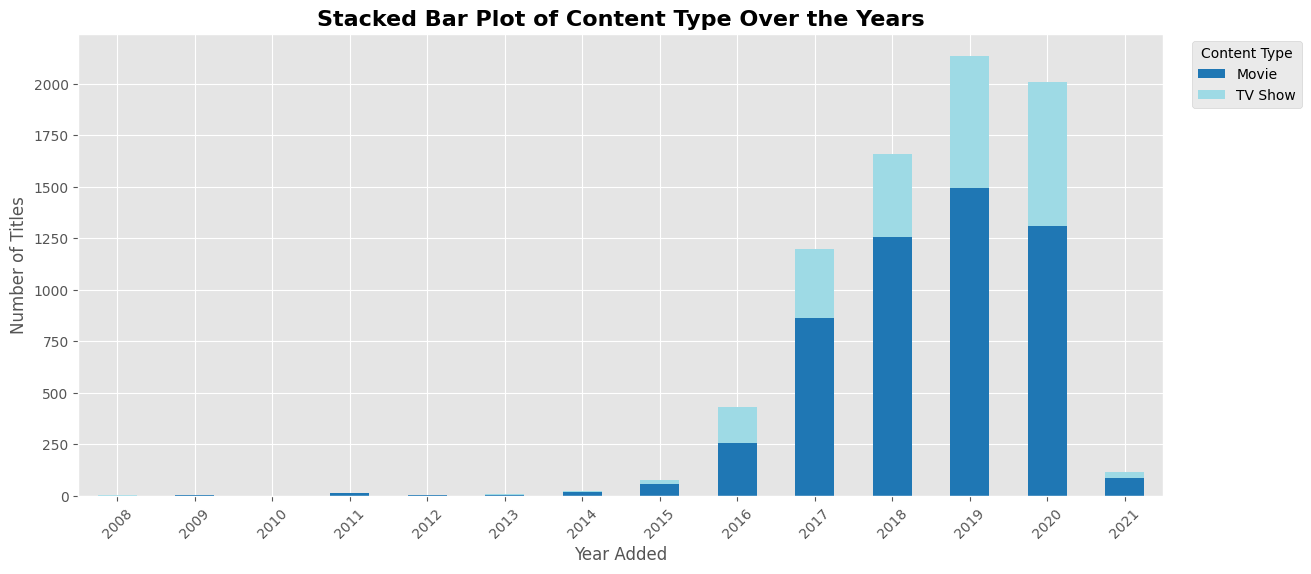

In [ ]:
# Chart - 9 visualization code
# Stacked Bar Plot of Content Type Over Year Added
# Group and pivot data
content_year = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
# Create bar plot
content_year.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
# Add title and labels
plt.title('Stacked Bar Plot of Content Type Over the Years', fontsize=16, fontweight = 'bold')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
# Set x-ticks rotation
plt.xticks(rotation=45)
# Add legend
plt.legend(title='Content Type', bbox_to_anchor=(1.02, 1), loc='upper left')
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

To understand how the distribution of Movies and TV Shows evolved over time on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Movies dominate, but TV shows steadily grew from 2016 onwards, indicating a strategic content expansion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-** Shows Netflix is diversifying its portfolio to cater to binge-watch culture.

**Negative Impact-** If TV content surpasses demand, it could lead to oversaturation.



#### Chart - 10 - Movie Duration by Rating


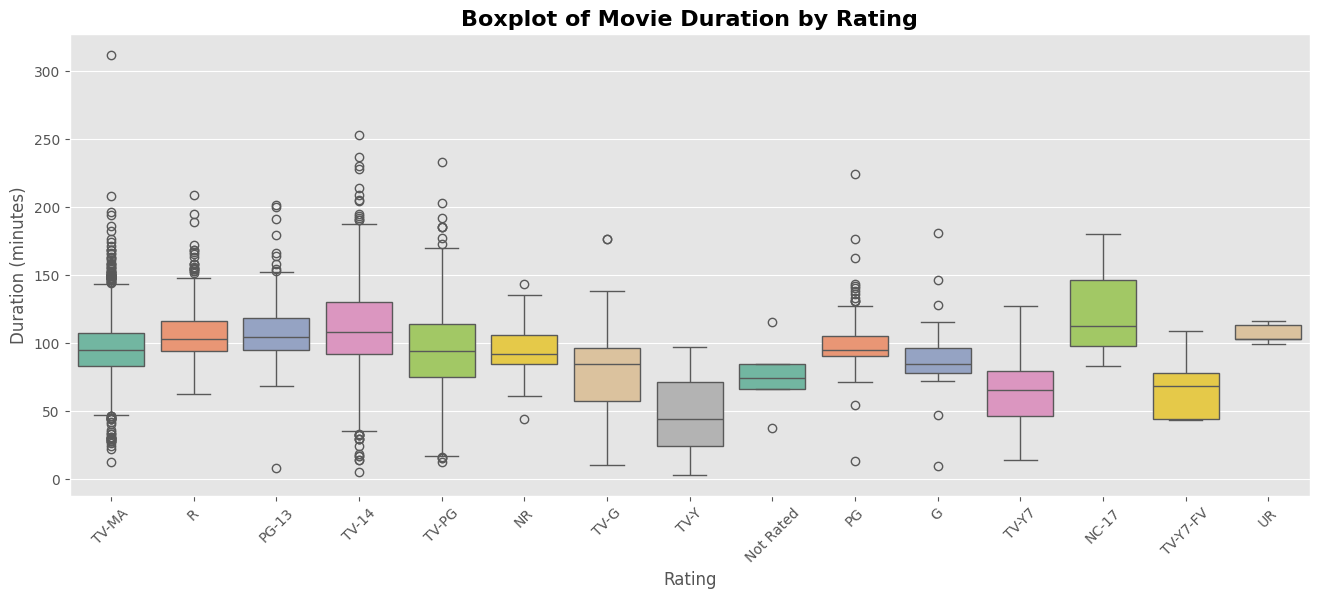

In [ ]:
# Chart - 10 visualization code
# Boxplot of Movie Duration by Rating
# Filter only Movies
movies_df = df[df['type'] == 'Movie']
# Set figure size
plt.figure(figsize=(16, 6))
# Create box plot
sns.boxplot(data=movies_df, x='rating', y='duration_value', palette='Set2')
# Add title and labels
plt.title('Boxplot of Movie Duration by Rating', fontsize = 16, fontweight = 'bold')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
# Set x-ticks rotation
plt.xticks(rotation=45)
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

To explore how movie lengths vary by content rating.

##### 2. What is/are the insight(s) found from the chart?

'PG-13' and 'R' have wider variability, while 'G' and 'TV-G' are more consistent and shorter.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-** Helps Netflix tailor duration according to target audience and rating expectations.

**Negative Impact-** Overlong content in general audience ratings might disengage viewers.



#### Chart - 11 - Genres Split by Content Type

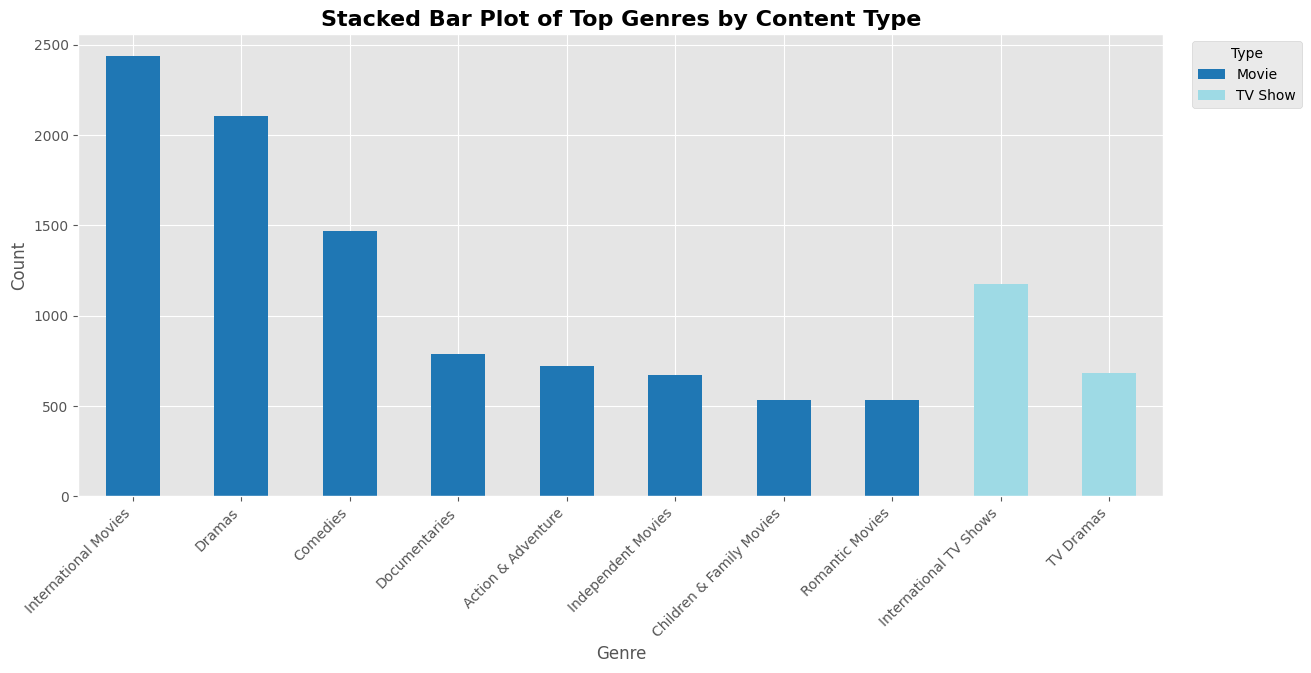

In [ ]:
# Chart - 11 visualization code
# Genres Split by Content Type
# Split genres and explode
genre_split = df[['type', 'listed_in']].copy()
genre_split['listed_in'] = genre_split['listed_in'].str.split(', ')
genre_split = genre_split.explode('listed_in')
genre_split.rename(columns={'listed_in': 'genre'}, inplace=True)

# Get top 10 genres
top_genres = genre_split['genre'].value_counts().head(10).index
genre_top = genre_split[genre_split['genre'].isin(top_genres)]

# Create a pivot table for stacked bar
genre_counts = genre_top.pivot_table(index='genre', columns='type', aggfunc='size', fill_value=0)

# Counting genres by content type
genre_counts = genre_counts.sort_values(by=['Movie', 'TV Show'], ascending=False)
# Create bar plot
genre_counts[['Movie', 'TV Show']].plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
# Add title and labels
plt.title('Stacked Bar Plot of Top Genres by Content Type', fontsize=16, fontweight = 'bold')
plt.xlabel('Genre')
plt.ylabel('Count')
# Set rotation for x-ticks
plt.xticks(rotation=45, ha='right')
# Add legend
plt.legend(title='Type', bbox_to_anchor=(1.02, 1), loc='upper left')
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

The stacked bar plot is chosen to show both the individual and combined popularity of each genre while comparing between Movies and TV Shows in a single bar. It enables fast visual assessment of dominance or balance in content types for each genre.

##### 2. What is/are the insight(s) found from the chart?

Genres like International TV, and TV Dramas are highly skewed toward TV Shows, while Comedies and Dramas dominate the Movie side. It shows that content format and audience engagement styles differ by genre.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**
Netflix can tailor their content acquisition and production strategies to meet consumer preferences. For example, if users prefer Documentaries as TV Shows, Netflix could invest more in episodic documentary formats instead of standalone films.

**Negative Impact-**
If Netflix does not balance its genre portfolio, suppose - if it misses out on emerging genres like Sci-Fi in TV format, it may lose viewer segments to competitors offering more diverse selections. This could potentially lead to subscriber churn.

#### Chart - 12 - Content Type by Country


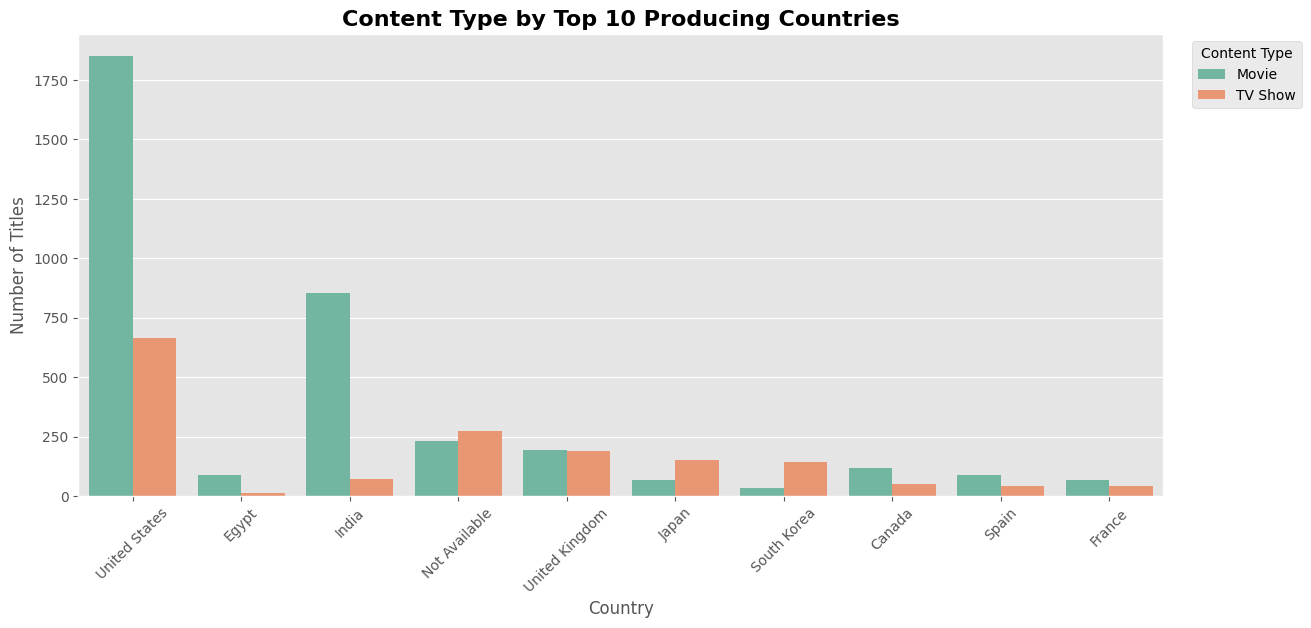

In [ ]:
# Chart - 12 visualization code
# Count Plot of Content Type by Country
# Finding top 10 countries
top_countries = df['country'].value_counts().head(10).index
df_top_countries = df[df['country'].isin(top_countries)]
# Set figure size
plt.figure(figsize=(14, 6))
# Create countplot
sns.countplot(data=df_top_countries, x='country', hue='type', palette='Set2')
# Add title and labels
plt.title('Content Type by Top 10 Producing Countries', fontsize = 16, fontweight = 'bold')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
# Set x-ticks rotation
plt.xticks(rotation=45)
# Add legend
plt.legend(title='Content Type', bbox_to_anchor=(1.02, 1), loc='upper left')
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to compare how different countries contribute to Netflix's library of Movies and TV Shows. A grouped count plot effectively shows side-by-side comparisons, helping us quickly identify content type dominance across countries.

##### 2. What is/are the insight(s) found from the chart?

* The U.S. dominates with the highest number of both Movies and TV Shows, especially Movies.

* India and the U.K. contribute heavily to Movies, while South Korea and Japan lean more toward TV Shows.

* Some countries offer a more balanced mix, like France and Canada.

These insights reflect regional strengths and content preferences on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impact-**
Netflix can use this to optimize content strategy by region, invest more in underrepresented formats (e.g., more TV Shows from India), and ensure better localization. This can improve user engagement and subscriber growth.

**Negative Impact-**
If Netflix continues to rely heavily on a few countries or ignores regional content preferences, it may lose relevance in some markets. A more balanced content offering can prevent such disengagement.

#### Chart - 13 - Year Added vs. Number of Releases

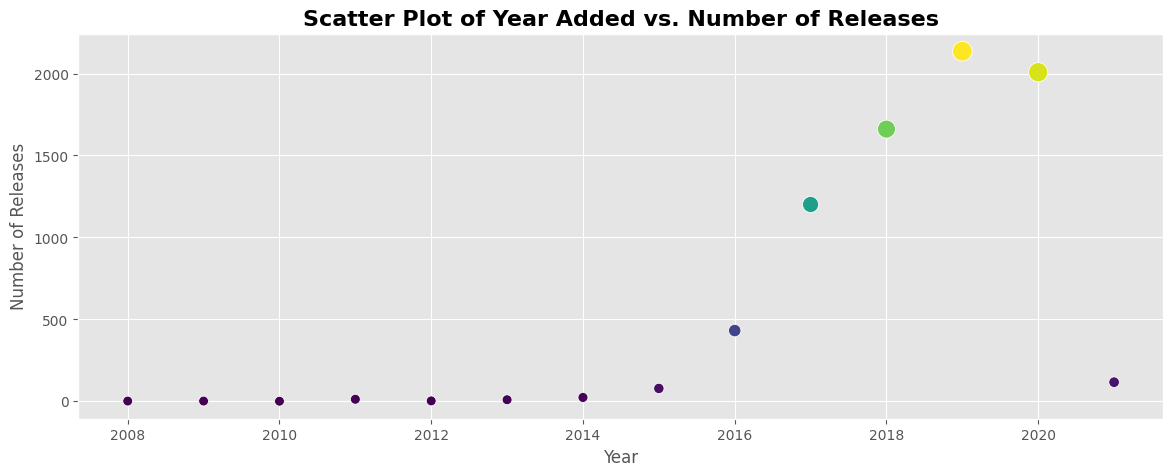

In [ ]:
# Chart - 13 visualization code
# Year Added vs. Number of Releases
# Calculating year counts
year_counts = df['year_added'].value_counts().reset_index()
year_counts.columns = ['year', 'count']
# Set figure size
plt.figure(figsize=(14, 5))
# Create scatter plot
sns.scatterplot(data=year_counts, x='year', y='count', size='count', hue='count', palette='viridis', legend=False, sizes=(50, 200))
# Add title and labels
plt.title('Scatter Plot of Year Added vs. Number of Releases', fontsize = 16, fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
# Show Plot
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for identifying yearly trends and fluctuations in the volume of content added to Netflix. It visually represents how the platform's content library has expanded or contracted over time, showing the distribution and density of releases per year.

##### 2. What is/are the insight(s) found from the chart?

* The number of releases on Netflix increased steadily from 2015 to 2019, indicating a period of aggressive content acquisition and production.

* The peak occurs around 2019-2020, suggesting Netflix was scaling rapidly, possibly in response to growing competition from other streaming platforms.

* A notable drop may be observed in 2021, likely due to the COVID-19 pandemic's impact on global film and TV production.

This trend highlights how Netflix ramped up its catalog to attract and retain users, with potential setbacks due to external disruptions.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**

* Understanding when the platform added the most content helps Netflix:

* Analyze the ROI on content acquisition in those peak years.

* Forecast demand and plan future content drops more strategically.

* Use past release performance data to optimize release schedules.

Such insights can improve engagement, drive subscriptions, and inform global expansion efforts.

**Negative Impact-**

The sharp dip post-2020 could reflect reduced content output, which, if prolonged, might weaken user engagement and increase churn rates. If users perceive a stagnation in new content, it can hurt platform loyalty. It’s crucial for Netflix to diversify production hubs globally to avoid similar slowdowns in the future.

#### Chart - 14 - Number of Movies/TV Shows by Rating

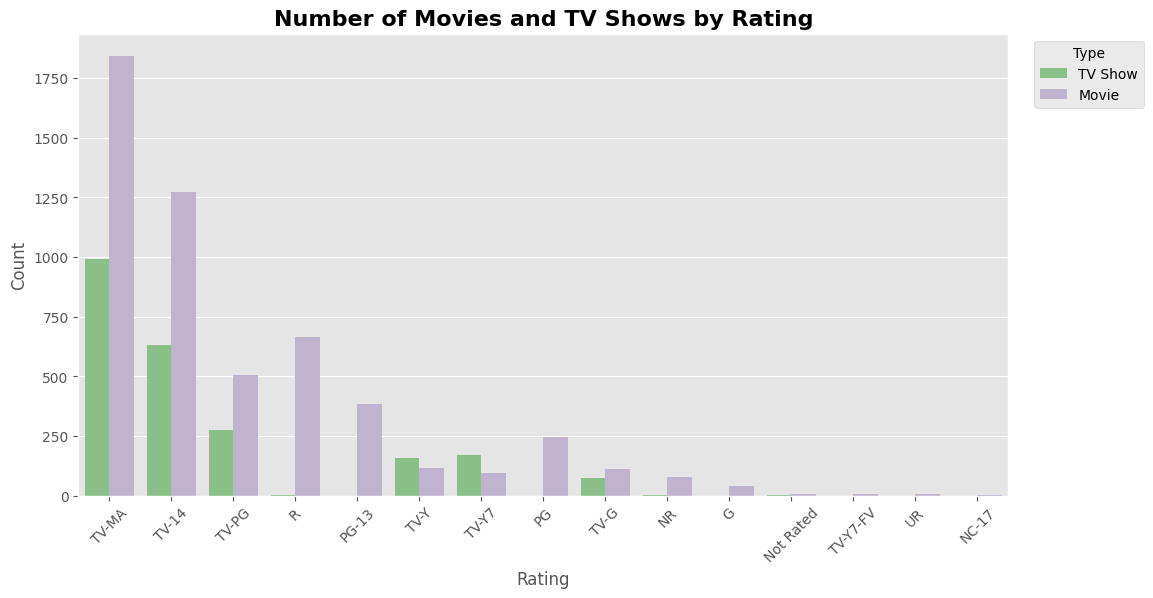

In [ ]:
# Chart - 14 visualization code
# Number of Movies/TV Shows by Rating
# Set figure size
plt.figure(figsize=(12, 6))
# Create countplot
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette='Accent')
# Add title and labels
plt.title('Number of Movies and TV Shows by Rating', fontsize = 16, fontweight = 'bold')
plt.xlabel('Rating')
plt.ylabel('Count')
# Set x-ticks rotation
plt.xticks(rotation=45)
# Add legend
plt.legend(title='Type', bbox_to_anchor=(1.02, 1), loc='upper left')
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is effective for visualizing categorical comparisons, making it ideal for understanding how content is distributed across different audience ratings (e.g., TV-MA, PG, R). It helps identify Netflix’s target audience segments based on content maturity.

##### 2. What is/are the insight(s) found from the chart?

* TV-MA (Mature Audience) dominates the catalog, showing Netflix produces or acquires a large volume of content aimed at adults.

* Ratings like TV-14 and TV-PG also have significant presence, indicating a solid offering for teens and families.

* R-rated and PG-13 content follow behind, while ratings like G or TV-Y are minimal, showing less focus on children's content.

This distribution suggests Netflix's focus lies more in mature and general audience content rather than children-specific programming.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**

This helps Netflix understand which audience segments are most catered to, and whether there's an underserved demographic like children or older adults. That insight can inform future content investment to balance the library, increasing appeal across all age groups.

**Negative Impact-**

If content is overly skewed toward mature audiences, Netflix may miss growth opportunities in family and kids segments, which are key for long-term subscriber retention in multi-member households. A more balanced content mix could improve reach.

### **Multivariate Analysis**

#### Chart - 15 - Country vs. Content Type vs. Year

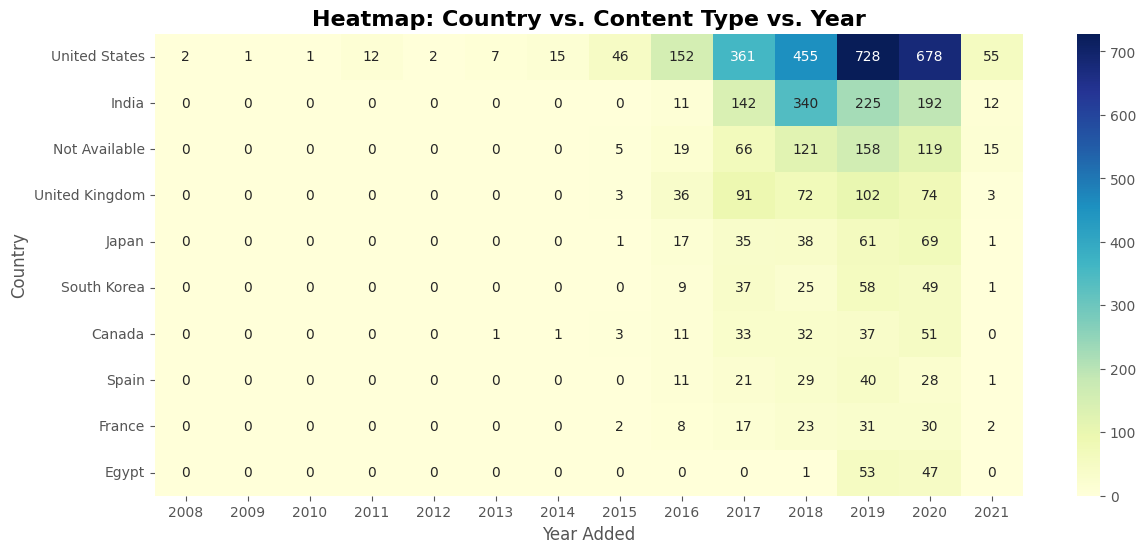

In [ ]:
# Chart - 15 visualization code
# Country vs. Content Type vs. Year
# Prepare data for heatmap
heatmap_data = df.pivot_table(index='country', columns='year_added', values='type', aggfunc='count', fill_value=0)
top_countries = heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index
heatmap_data = heatmap_data.loc[top_countries]

# Set figure size
plt.figure(figsize=(14,6))
# Create heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
# Add title and labels
plt.title('Heatmap: Country vs. Content Type vs. Year', fontsize = 16, fontweight = 'bold')
plt.xlabel('Year Added')
plt.ylabel('Country')
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

This heatmap visualizes how content additions vary year-over-year across countries, highlighting trends in content production for top content-producing countries.

##### 2. What is/are the insight(s) found from the chart?

* Countries like the U.S. and India have consistently high content addition across years, while others (e.g., South Korea, the U.K.) show gradual growth.

* Certain years (e.g., 2018-2020) exhibit spikes in content additions globally.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**
Helps identify key regional contributors and the pace of content acquisition. It can improve regional content diversification and inform expansion strategies.



#### Chart - 16 - Year Added vs. Content Type vs. Rating

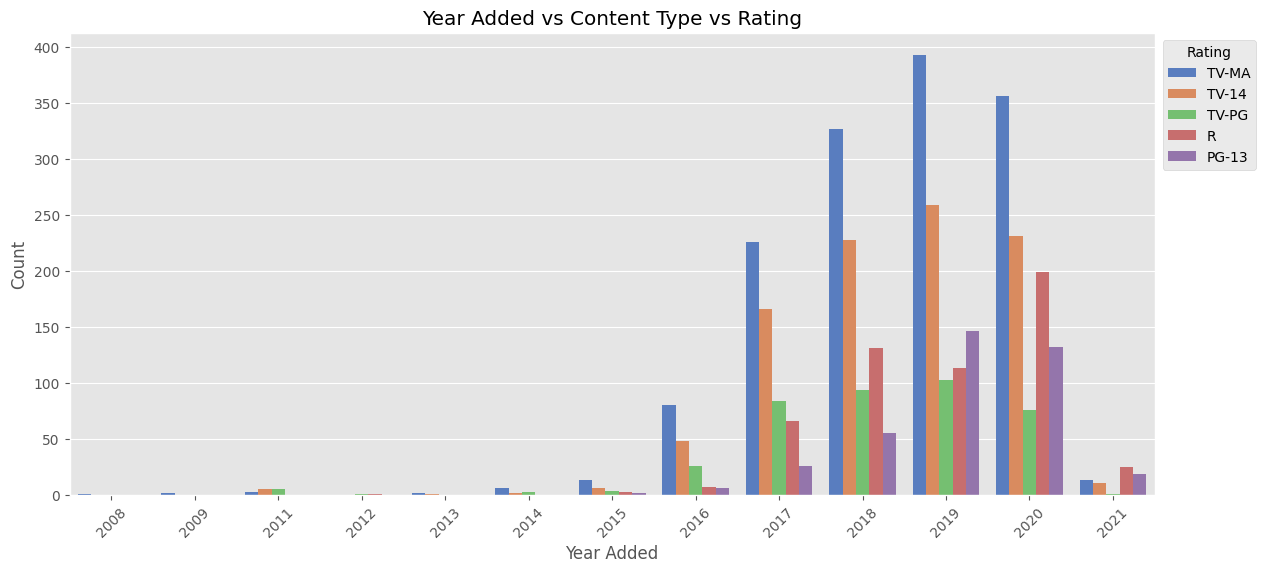

In [ ]:
# Chart - 16 visualization code
# Year Added vs. Content Type vs. Rating
# Prepare data
grouped_data = df.groupby(['year_added', 'type', 'rating']).size().reset_index(name='count')
top_ratings = df['rating'].value_counts().head(5).index
grouped_data = grouped_data[grouped_data['rating'].isin(top_ratings)]

# Plot grouped bar plot
plt.figure(figsize=(14,6))
sns.barplot(data=grouped_data, x='year_added', y='count', hue='rating', palette='muted', ci = None)
plt.title('Year Added vs Content Type vs Rating')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.10, 1))
plt.xticks(rotation=45)

plt.show()



##### 1. Why did you pick the specific chart?

This grouped bar plot shows the distribution of ratings over the years across Movies/TV Shows to identify shifting trends in content maturity.

##### 2. What is/are the insight(s) found from the chart?

Growth in TV-MA and TV-14 content after 2017 reflects Netflix's increasing focus on mature content and teen programming to cater to evolving viewer preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**
Helps balance content strategy by rating, ensuring enough family-friendly content is added alongside mature programming to widen the audience base.



#### Chart - 17 - Cluster Plot of Content Based on Text Features (Title, Genre, Description)

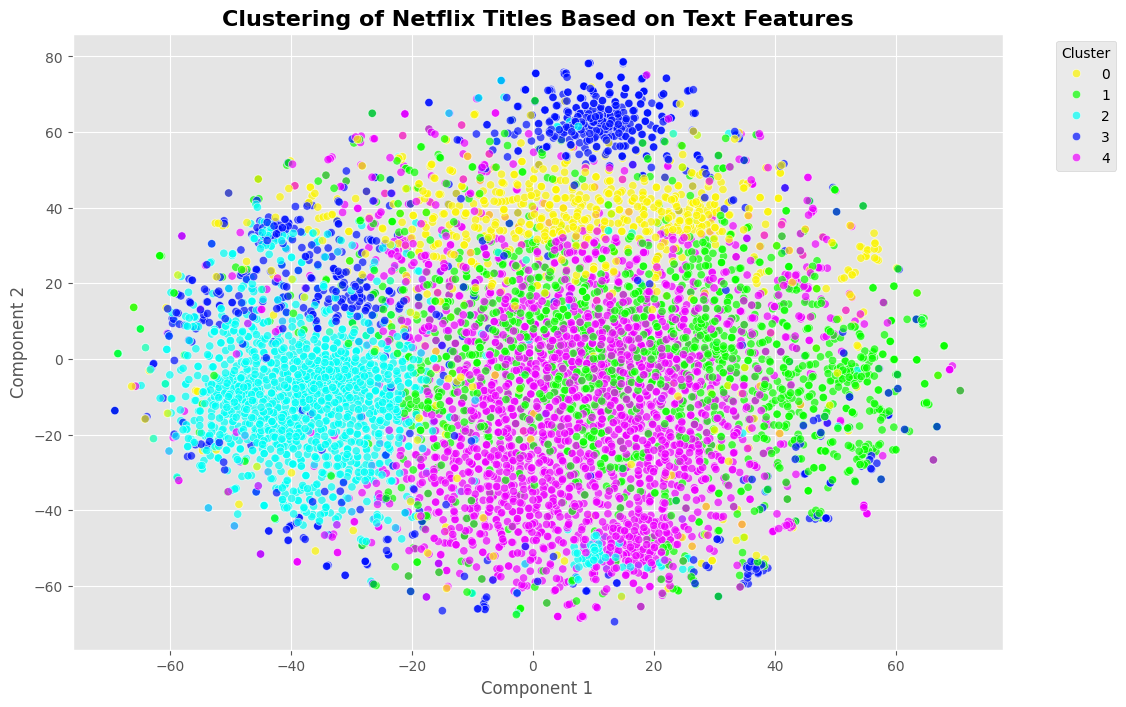

In [ ]:
# Chart - 17 visualization code
# Cluster Plot of Content Based on Text Features (Title, Genre, Description)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Combine text fields: title, description, and listed_in (genres)
df['combined_text'] = df['title'].astype(str) + ' ' + df['description'].astype(str) + ' ' + df['listed_in'].astype(str)

# Fill any missing combined_text with blank string
df['combined_text'] = df['combined_text'].fillna('')

# Step 1: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(df['combined_text'])

# Step 2: KMeans Clustering
k = 5  # number of clusters (for exploratory purposes)
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)

# Step 3: Dimensionality Reduction for Visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Add coordinates to the dataframe
df['x_tsne'] = X_tsne[:, 0]
df['y_tsne'] = X_tsne[:, 1]

# Step 4: Create Scatter Plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette("hsv", k)
sns.scatterplot(data=df, x='x_tsne', y='y_tsne', hue='cluster', palette=palette, alpha=0.7)
# Add title and labels
plt.title('Clustering of Netflix Titles Based on Text Features', fontsize=16, fontweight = 'bold')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
# Add legend
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

The cluster plot is ideal when we want to group content based on similarities in text-based attributes like title, genre, and description. Since the Netflix dataset contains many unstructured textual fields, visualizing clusters formed from these text features helps uncover hidden patterns and groupings. The scatter plot (2D) provides a simplified view of high-dimensional content similarity after dimensionality reduction using PCA or t-SNE.

##### 2. What is/are the insight(s) found from the chart?

The plot reveals that Netflix content naturally groups into clusters that represent specific genres or themes—like documentaries, international dramas, stand-up comedy, and TV shows. On analyzing each cluster:

 * Cluster 0 mostly contains documentaries.

 * Cluster 1 is dominated by comedies, dramas, and international movies.

 * Cluster 2 focuses on international TV dramas.

 * Cluster 3 revolves around stand-up comedy.

 * Cluster 4 contains international dramas and emotional content.

This suggests that Netflix content can be effectively segmented using textual metadata alone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact-**

Clustering results can help Netflix recommend similar content to users based on what they've watched previously. It also aids in content curation, personalization, and targeted marketing. Knowing the dominant themes or genres per cluster allows Netflix to identify content gaps or areas of over-saturation. There aren't any direct insights pointing to negative growth, but a possible challenge could be content redundancy, for example- too many shows in the same genre might result in user fatigue if not recommended strategically.



#### Chart - 18 - Correlation Heatmap

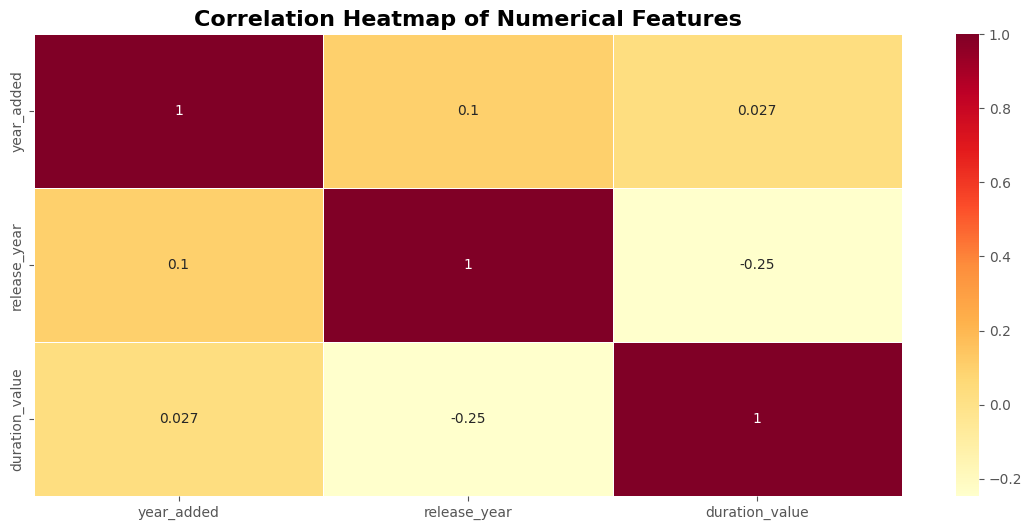

In [ ]:
# Correlation Heatmap visualization code
# Select relevant numeric columns
numerical_cols = ['year_added', 'release_year', 'duration_value']
corr_matrix = df[numerical_cols].corr()

# Set figure size
plt.figure(figsize=(14,6))
# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', linewidths=0.5)
# Add title
plt.title('Correlation Heatmap of Numerical Features', fontsize = 16, fontweight = 'bold')
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

To analyze relationships between key numerical variables and identify trends or potential multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

A correlation between release year and year added suggests Netflix frequently adds newer content. There’s minimal correlation between duration and other variables.

#### Chart - 19 - Pair Plot

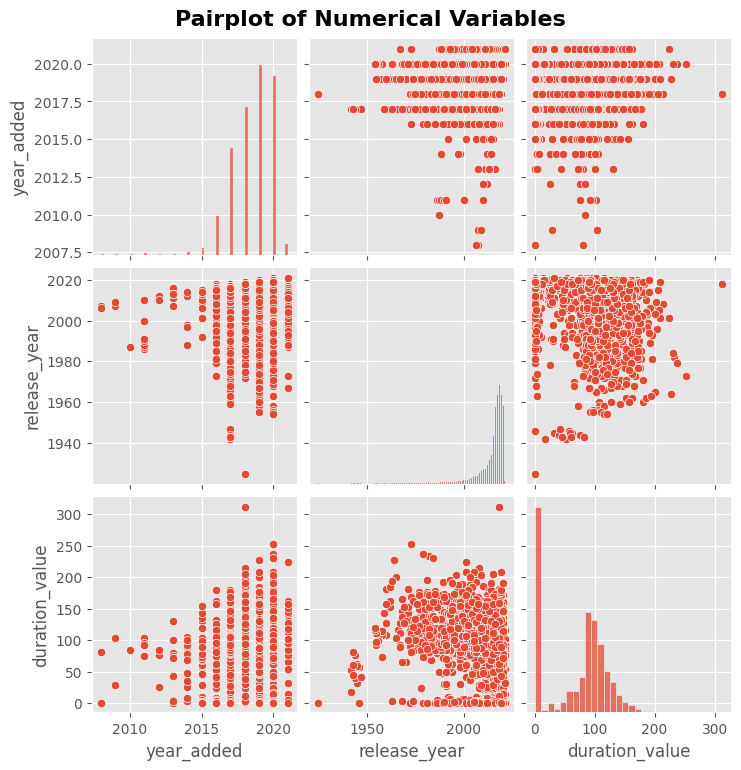

In [ ]:
# Pair Plot visualization code
# Create pairplot
sns.pairplot(df[['year_added', 'release_year', 'duration_value']])
# Add title
plt.suptitle('Pairplot of Numerical Variables', y=1.02, fontsize = 16, fontweight = 'bold')
# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

Pairplots provide a comprehensive view of relationships between numeric variables, highlighting potential patterns and distributions.

##### 2. What is/are the insight(s) found from the chart?

Reveals clustering around specific release years and duration patterns. Shows if older content is being added in certain years.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the goal of growing viewership, improving content recommendations, and expanding audience reach, the following strategic actions are suggested based on insights from the data:

1. **Invest in High-Performing Genres and Formats-**

 * Dramas, Comedies, and Documentaries consistently dominate the platform across both movies and TV shows.

 * Focus on expanding these genres with diverse sub-genres and region-specific stories to retain and attract a wider audience.

2. **Leverage Regional Content Preferences-**

 * Countries like the United States, India, and United Kingdom are top contributors to the content library.

 * Produce and promote more localized content in these regions while also identifying underrepresented markets with growing potential.

3. **Optimize Content Rating Mix-**

 * A significant portion of content is rated TV-MA and R, which limits younger viewers.

 * Balance content ratings by producing more PG, TV-PG, and TV-14 shows and movies to attract family-friendly and teen segments.

4. **Capitalize on Seasonal and Monthly Trends-**

 * Most content is added during July-October, suggesting a mid-year to year-end release trend.

 * Spread content releases more evenly across all months to maintain consistent engagement throughout the year.

5. **Enhance Recommendation Systems with Metadata-**

 * Use metadata like genre, duration, content type, rating, and release timing to improve content discovery and personalized recommendations.

 * This improves user satisfaction and increases watch time.

6. **Leverage Clustering Insights-**

 * Clustering similar content based on text features (titles, genres, descriptions) enables:

 * Personalized content recommendations.

 * Grouping similar titles for smarter marketing campaigns.

 * Identifying underutilized or niche content clusters for growth.

By aligning content strategies with audience preferences, diversifying the content library, and using data-driven personalization, Netflix can boost engagement, enhance user retention, and expand its global market presence effectively.





# **Conclusion**

From the analysis, we can conclude that netflix adopts a data-driven and audience-centric content strategy. Their dominance in Movies, rising interest in TV Shows, genre flexibility, and localization through country-specific content highlight their intent to capture a diverse and global market. These findings offer valuable guidance for content acquisition, original production, personalized recommendations, and marketing strategies. Clustering was applied using TF-IDF vectorization and KMeans on text-based features like title, genres, and description. This helped group similar types of content into meaningful clusters, such as documentaries, international dramas, and stand-up comedy.

These insights can support personalized recommendations, strategic content curation, and audience-specific marketing, enhancing Netflix's ability to align offerings with viewer preferences. By continuing to invest in genre diversity, age-appropriate ratings, and localized content production, Netflix can further strengthen user engagement, improve satisfaction, and sustain its competitive advantage in the ever-evolving streaming landscape.

